In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

**Data Visualisation**

In [24]:
# Load the data
data = pd.read_csv("../data/sp500_5_years_data.csv", parse_dates=["Date"], index_col="Date")

# Quick overview
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-30 00:00:00-04:00,2558.979980,2631.800049,2545.280029,2626.649902,5751120000,0.0,0.0
2020-03-31 00:00:00-04:00,2614.689941,2641.389893,2571.149902,2584.590088,6576210000,0.0,0.0
2020-04-01 00:00:00-04:00,2498.080078,2522.750000,2447.489990,2470.500000,5964000000,0.0,0.0
2020-04-02 00:00:00-04:00,2458.540039,2533.219971,2455.790039,2526.899902,6464190000,0.0,0.0
2020-04-03 00:00:00-04:00,2514.919922,2538.179932,2459.959961,2488.649902,6096970000,0.0,0.0


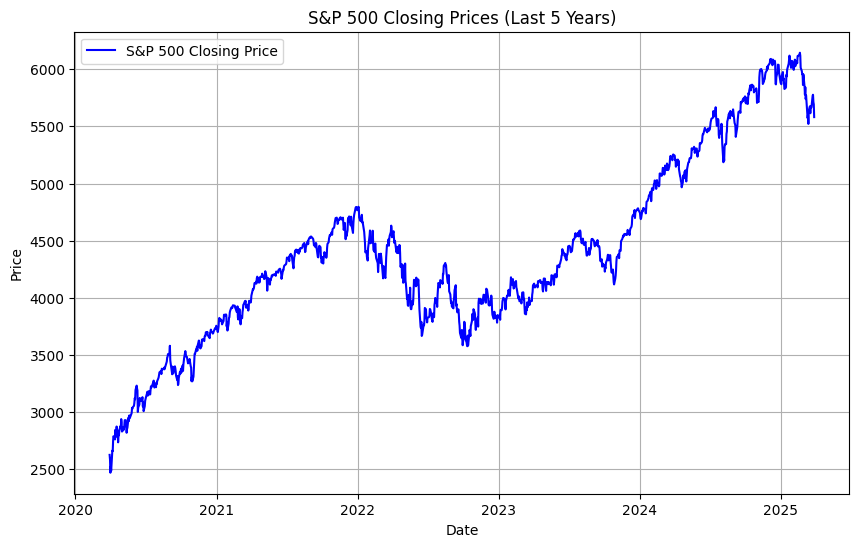

In [25]:
# trend analysis 
# Plot closing prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Close"], label="S&P 500 Closing Price", color="blue")
plt.title("S&P 500 Closing Prices (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Daily return is today's (closing price - yesterday's closing price ) / yesterday's closing price 
# Its commonly used to measure volatility 

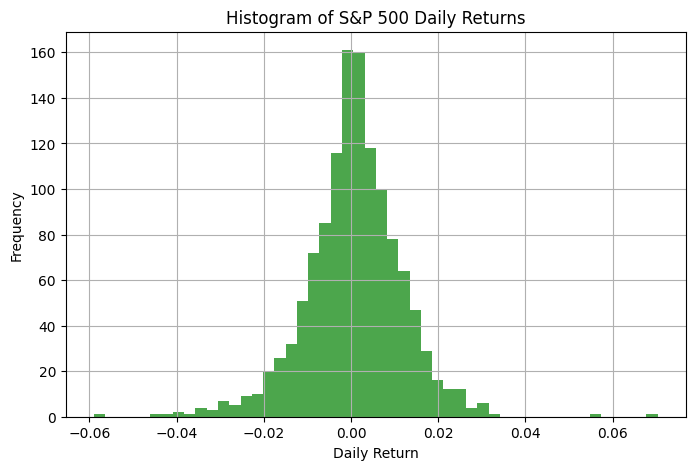

In [27]:
# Calculate daily returns
data["Daily_Return"] = data["Close"].pct_change()

# Plot histogram of daily returns
plt.figure(figsize=(8, 5))
plt.hist(data["Daily_Return"].dropna(), bins=50, alpha=0.7, color="green")
plt.title("Histogram of S&P 500 Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [28]:
# Summary statistics
data[["Close", "Daily_Return"]].describe()


,Close,Daily_Return
count,1257.000000,1256.000000
mean,4393.325451,0.000662
std,791.385691,0.011091
min,2470.500000,-0.058944
25%,3901.820068,-0.005168
50%,4300.169922,0.000884
75%,4766.180176,0.007191
max,6144.149902,0.070331


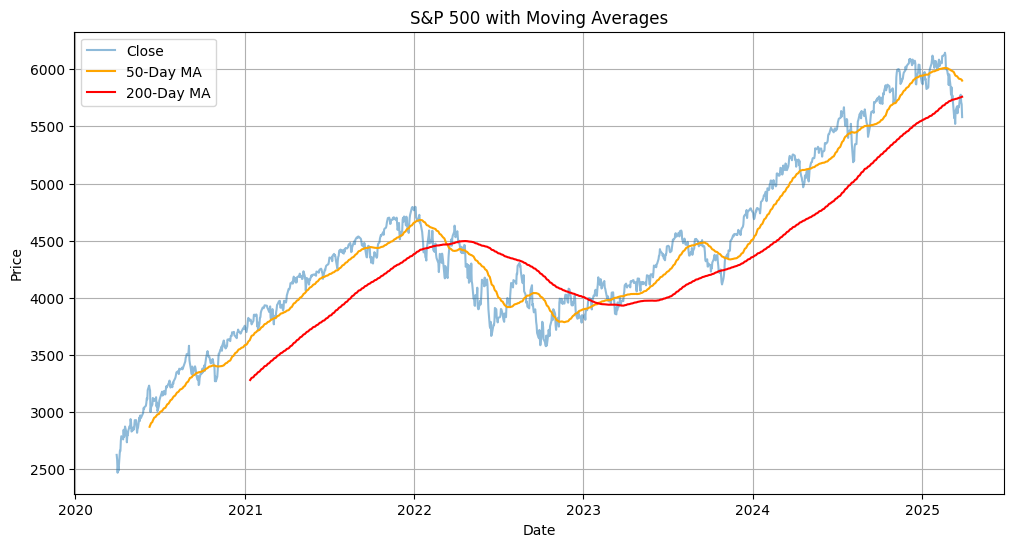

In [29]:
# Calculate moving averages
data["50_MA"] = data["Close"].rolling(window=50).mean()
data["200_MA"] = data["Close"].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Close", alpha=0.5)
plt.plot(data.index, data["50_MA"], label="50-Day MA", color="orange")
plt.plot(data.index, data["200_MA"], label="200-Day MA", color="red")
plt.title("S&P 500 with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# the market is bullish for the last 2 years (the 50 MA crosses above the 200 MA)

In [31]:
# Focus on predicting the next day's closing price of the S&P 500 using historical features
 

**Preprocessing**

In [32]:
data.isna().sum()

Open              0
High              0
Low               0
Close             0
Volume            0
Dividends         0
Stock Splits      0
Daily_Return      1
50_MA            49
200_MA          199
dtype: int64

In [33]:
# new features 
data["Lag_1"] = data["Close"].shift(1)  # Previous day's close
data["Lag_2"] = data["Close"].shift(2)  # Two days ago

In [34]:
# data['Daily_Return'] = data['Daily_Return'].fillna(data['Daily_Return'].median())

In [35]:
data = data.dropna()

In [36]:
# Features and target
X = data.drop("Close", axis=1)  # Features
y = data["Close"]  # Target

In [37]:
# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold()
# selector.fit(X)
# selector.get_feature_names_out()


In [38]:
from sklearn.feature_selection import SelectKBest, f_regression
# Créer un objet SelectKBest avec la fonction de score f_classif
selector = SelectKBest(score_func=f_regression, k=5)
# Appliquer la méthode fit
selector.fit(X, y)
# On peut voir les caractéristiques sélectionnées
selector.get_feature_names_out()


array(['Open', 'High', 'Low', 'Lag_1', 'Lag_2'], dtype=object)

In [39]:
X= X[['Open', 'High', 'Low', 'Lag_1', 'Lag_2']]

In [40]:
from sklearn.model_selection import train_test_split
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.set_output(transform='pandas')
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [43]:
model = {
    "Linear Regression": LinearRegression(),  
    "Random Forest ": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
    
}

for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
# Predicted and true target values
    r2 = r2_score(y_test, y_pred)
    print(f"{name} a une précision de {r2}")
    # cv score 
    cv_score = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross validation score: {cv_score.mean()}") 
    print("--" * 40)

Linear Regression a une précision de 0.9992227259530119
Cross validation score: 0.9994643545985273
--------------------------------------------------------------------------------
Random Forest  a une précision de 0.9985993454789888
Cross validation score: 0.9988496934238131
--------------------------------------------------------------------------------
KNN a une précision de 0.9981878775938848
Cross validation score: 0.9982883304348643
--------------------------------------------------------------------------------


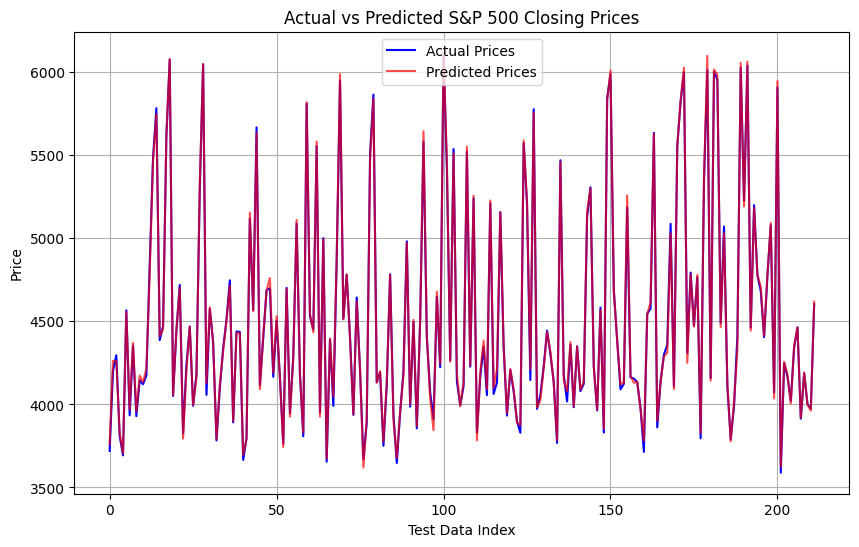

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="red", alpha=0.7)
plt.title("Actual vs Predicted S&P 500 Closing Prices")
plt.xlabel("Test Data Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

The best-performing model achieved an R² score close to 0.99, which means it explains 99% of the variance in the S&P 500 price data. That’s an exceptionally high level of predictive power.

Accuracy: A 99% R² score means the model captures almost all the trends and fluctuations in the test data. It's a strong indicator that the model generalizes well and makes reliable predictions.

Key Patterns:

The S&P 500 shows predictable patterns influenced by moving averages, volume changes, and price volatility.

The model was able to use these features effectively to anticipate price changes.

Business Value:

Such high predictive accuracy could be valuable for algorithmic trading, portfolio rebalancing, and investment risk management.

Financial analysts could use these models to forecast short- to medium-term trends, enhancing decision-making in volatile markets.